Гельбарт Лев, номер 11.
(11%17)+1 = 12
Примеры 12-16, пациенты 2,3,18,4,6

C:\Users\Lev\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Lev\AppData\Local\Temp\ipykernel_11728\2173992122.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv('2.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])


          osc  pressure
43421  1413.0     105.0
43422  1420.0      86.0
43423  1398.0     109.0
43424  1419.0     111.0
43425  1422.0     101.0
...       ...       ...
44664  1619.0     110.0
44665  1646.0      98.0
44666  1620.0     110.0
44667  1614.0      97.0
4         NaN       NaN

[1248 rows x 2 columns]
<class 'pandas.core.series.Series'>


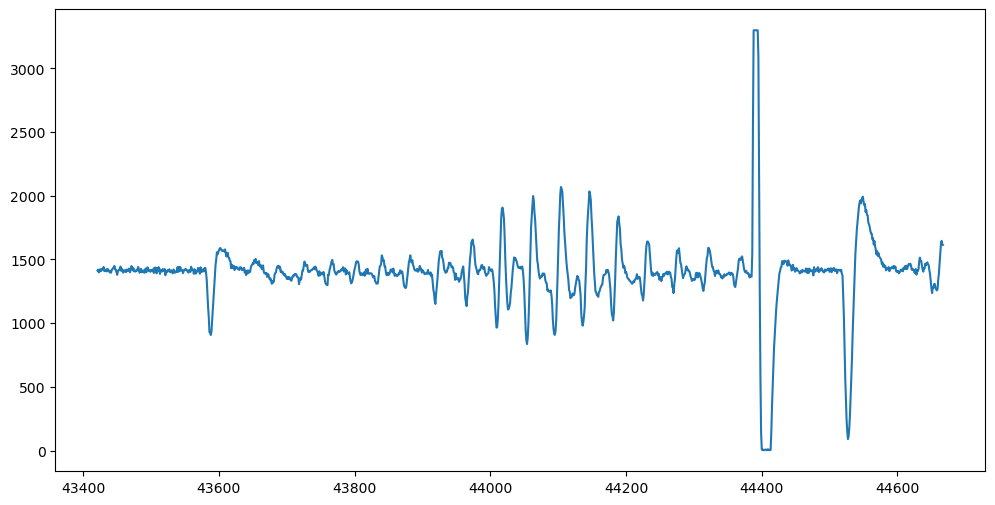

In [1]:
#1

from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
#import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

dataset = read_csv('2.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])
print(dataset)
osc = dataset.osc
osc.plot(figsize=(12,6))
print(type(osc))

C:\Users\Lev\AppData\Local\Temp\ipykernel_11728\4199784952.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv('3.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])


<class 'pandas.core.series.Series'>


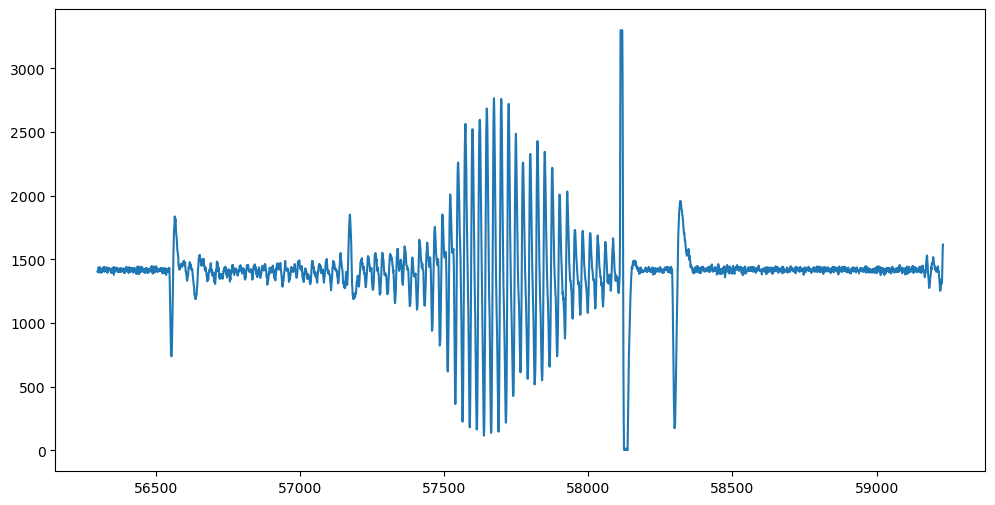

In [2]:
dataset = read_csv('3.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])
osc = dataset.osc
osc.plot(figsize=(12,6))
print(type(osc))

C:\Users\Lev\AppData\Local\Temp\ipykernel_11728\1820242967.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv('18.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])


<class 'pandas.core.series.Series'>


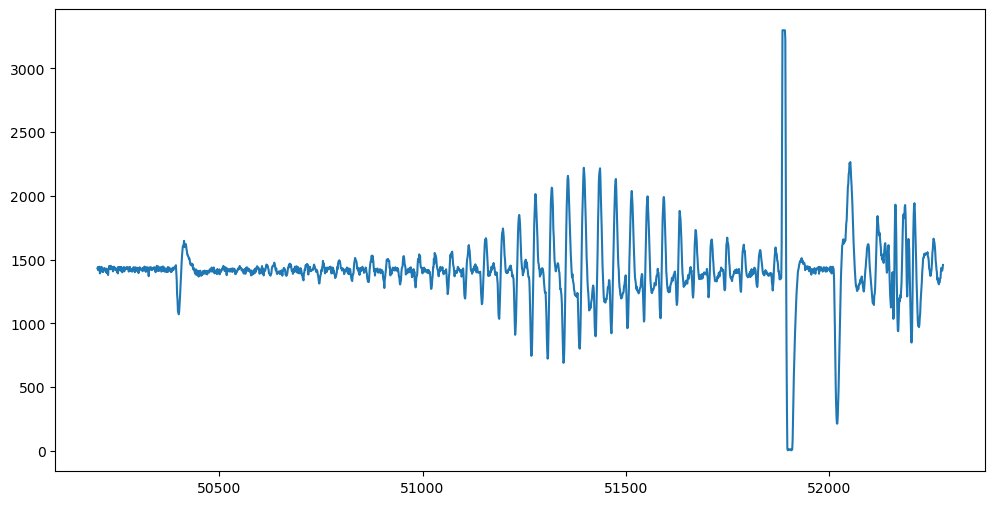

In [3]:
dataset = read_csv('18.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])
osc = dataset.osc
osc.plot(figsize=(12,6))
print(type(osc))

C:\Users\Lev\AppData\Local\Temp\ipykernel_11728\3708501018.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv('4.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])


<class 'pandas.core.series.Series'>


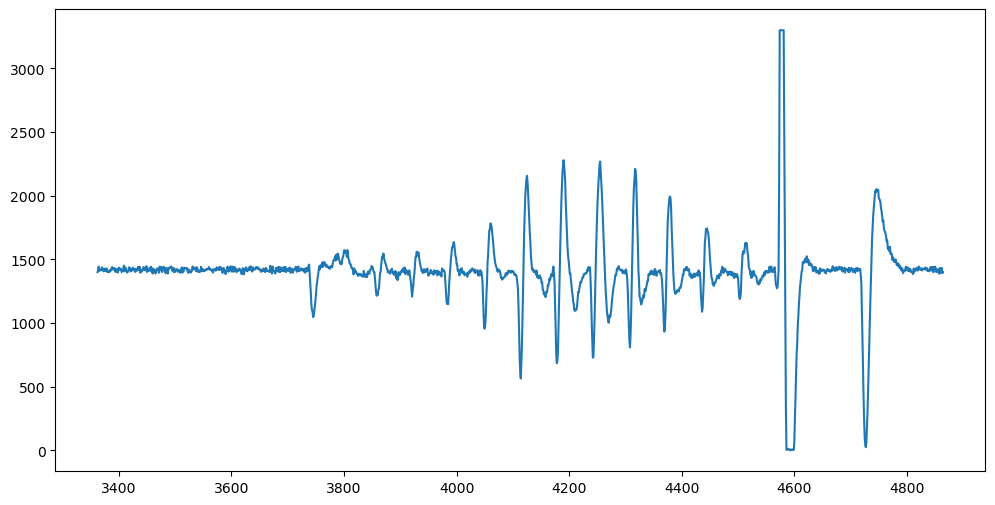

In [4]:
dataset = read_csv('4.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])
osc = dataset.osc
osc.plot(figsize=(12,6))
print(type(osc))

C:\Users\Lev\AppData\Local\Temp\ipykernel_11728\1565898019.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv('6.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])


<class 'pandas.core.series.Series'>


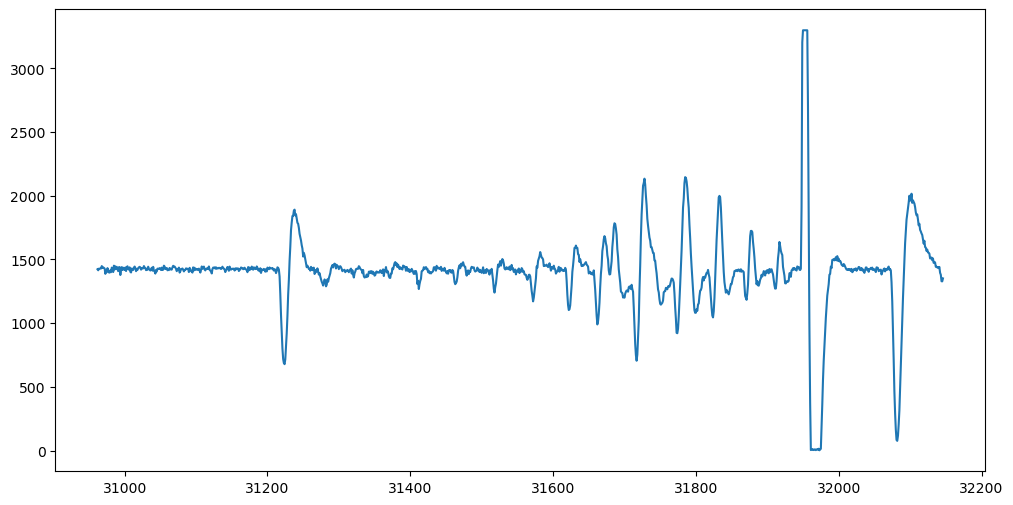

In [5]:
dataset = read_csv('6.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])
osc = dataset.osc
osc.plot(figsize=(12,6))
print(type(osc))

C:\Users\Lev\AppData\Local\Temp\ipykernel_11728\4083202461.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv('2.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])


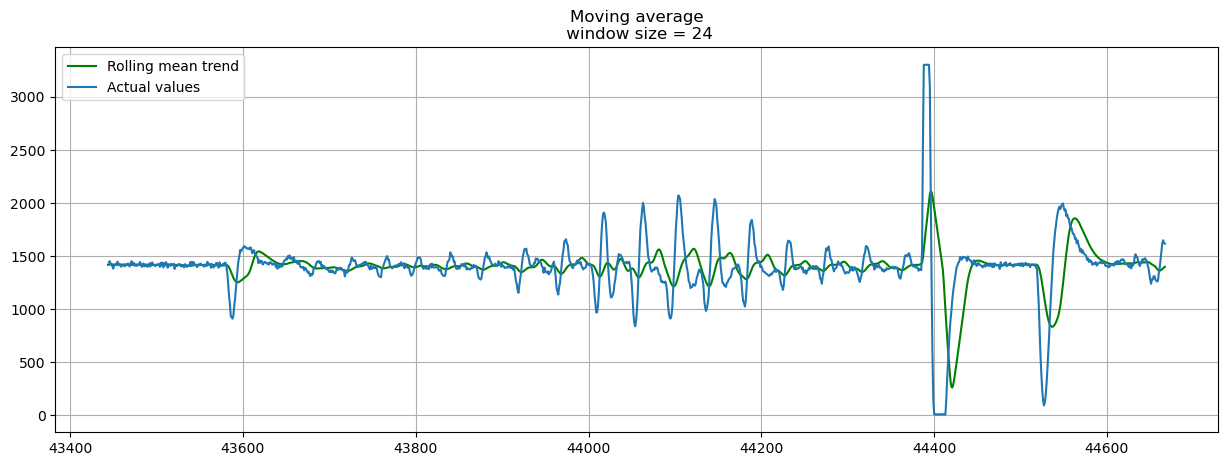

In [6]:
#2 скользящее среднее

dataset = read_csv('2.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])
osc = dataset.osc

def moving_average(series, n):
    return np.average(series[-n:])

def plotMovingAverage(series, n):

    rolling_mean = series.rolling(window=n).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(osc[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
plotMovingAverage(osc, 24)

In [7]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(osc, alpha), label="Alpha {}".format(alpha))
    plt.plot(osc.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

KeyError: 0

<Figure size 2000x800 with 0 Axes>

In [9]:
#3

dataset = read_csv('2.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])
osc = dataset.osc

arr = np.array(osc)
#надо изгнать NaN элемент, который последний
arr = np.delete(arr, 1247)    
print(arr)

series = np.fft.fft(arr)

print(series)

[1413. 1420. 1398. ... 1646. 1620. 1614.]
[1.74164700e+06    +0.j         1.56788130e+03-10763.52411916j
 1.28217674e+04 -8435.51885288j ... 1.50699208e+04 -6832.64144047j
 1.28217674e+04 +8435.51885288j 1.56788130e+03+10763.52411916j]


C:\Users\Lev\AppData\Local\Temp\ipykernel_11728\1413268512.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = read_csv('2.log', delim_whitespace=True, skiprows=1, names=['osc', 'pressure'])


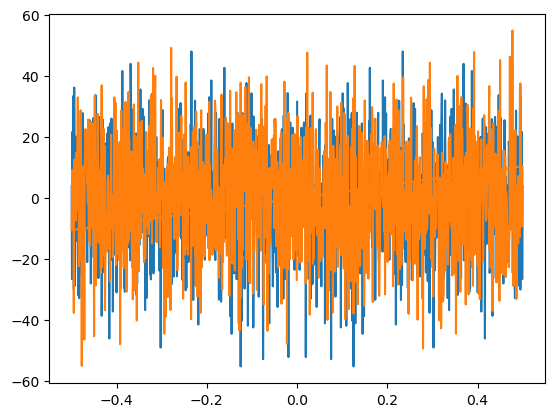

In [10]:
sine_vals = np.fft.fft(np.sin(arr))

# Creating frequency array of sine-value Fourier transforms
frequency = np.fft.fftfreq(arr.shape[-1])

# Plotting the real and imaginary parts
plt.plot(frequency, sine_vals.real, frequency, sine_vals.imag)
plt.show()

In [12]:
#4

test = sm.tsa.adfuller(osc)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']:
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен, тренда нет')

adf:  nan
p-value:  nan
Critical values:  {'1%': -3.4356048614183443, '5%': -2.8638605461891617, '10%': -2.5680054872544145}
единичных корней нет, ряд стационарен, тренда нет


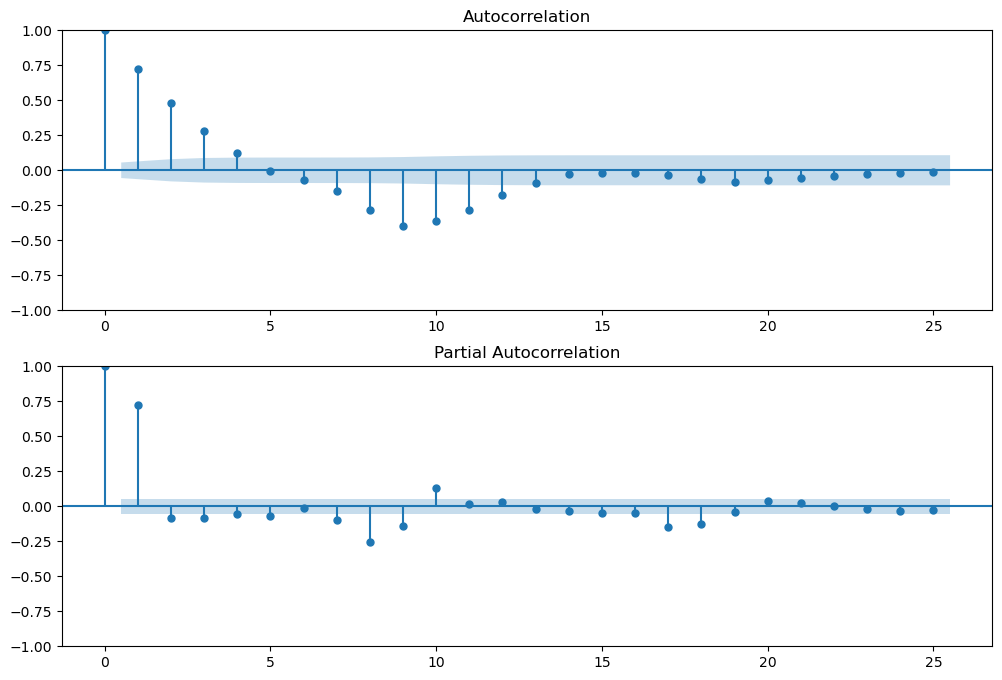

In [16]:
osc=osc.diff(periods=1).dropna()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(osc.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(osc, lags=25, ax=ax2)